## Solving bidomain equations on rectangular domain

### Importing required libraries

In [1]:
%cd ../../..
from src.models.dynamics_models import *
from src.models.cell_models import *
from src.utils import *
import ufl

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva


### Defining a domain, cell model and dynamics model and visualizing initial data

In [2]:
domain = rectangle(1, 1, 32, 32)
x = ufl.SpatialCoordinate(domain)

In [3]:
class CellModel(ReparametrizedFitzHughNagumo):
    def apply_current(self):
        locator = lambda x: x[0] < 0.1
        cells = fem.locate_dofs_geometrical(self.V1, locator)
        self.I_app.x.array[cells] = np.full_like(cells, 10)
        self.I_app_duration = 20

In [4]:
class Model(BidomainModel):
    def initial_V_m(self):
        self.V_m_n.x.array[:] = -85

    def conductivity(self):
        # Muscle fibres
        self.fibers = ufl.as_vector([1, 0])

        # Healthy conductivities
        self.M_i = self.SIGMA_IT * ufl.Identity(2) + (
            self.SIGMA_IN - self.SIGMA_IT
        ) * ufl.outer(self.fibers, self.fibers)
        self.M_e = self.SIGMA_ET * ufl.Identity(2) + (
            self.SIGMA_EN - self.SIGMA_ET
        ) * ufl.outer(self.fibers, self.fibers)

In [5]:
cell_model = CellModel(domain)
model = Model(domain, cell_model)

In [6]:
cell_model.plot_I_app(camera_direction=[1e-1,0,-1])

Widget(value='<iframe src="http://localhost:37251/index.html?ui=P_0x7f1a3d7bb910_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [7]:
model.solve(
    T=500,
    steps=500,
    save_to="rectangle/bidomain_MFN.mp4",
    signal_point=[0.5, 0.5, 0.0],
    camera_direction='xy'
)

Solving problem: 100%|██████████| 500/500 [04:44<00:00,  1.76it/s]


### Plotting a fiber orientations

In [8]:
plot_vector_field(domain, lambda x: (1, 0, 0), 0.03)

Widget(value='<iframe src="http://localhost:37251/index.html?ui=P_0x7f1ac80ad4d0_1&reconnect=auto" class="pyvi…

### Plotting a final plot of transmembrane potential

In [9]:
plot_function(model.V_m_n, "V_m", show_mesh=False)

Widget(value='<iframe src="http://localhost:37251/index.html?ui=P_0x7f1ac80b8710_2&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

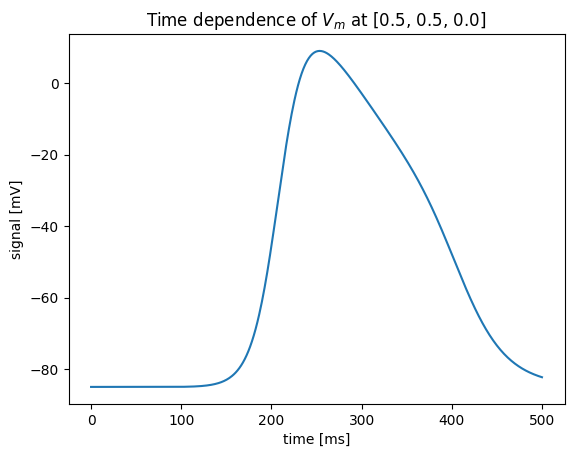

ERROR:wslink.protocol:Exception raised
ERROR:wslink.protocol:KeyError('834df62b4d786114f1dd0a3ca1d4351c_4225d')
ERROR:wslink.protocol:Traceback (most recent call last):
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/wslink/protocol.py", line 332, in onMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 30, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: '834df62b4d786114f1dd0a3ca1d4351c_4225d'



In [10]:
model.plot_signal()